In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

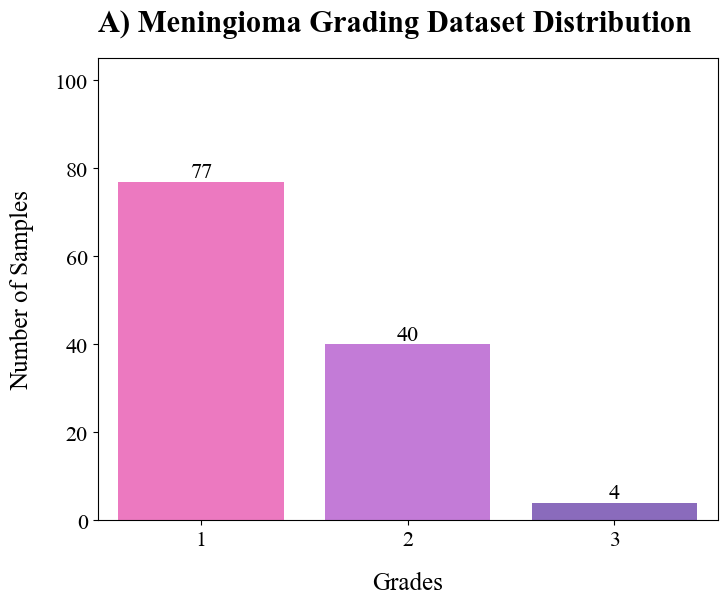

In [3]:
dataset = {
    "Grades": ["1", "2", "3"],
    "Number of Samples": [77, 40, 4]
}

data = pd.DataFrame(dataset)

colors = ["#ff66c4", "#cb6ce6", "#875dca"]

plt.figure(figsize=(8, 6))
sns.barplot(x="Grades", y="Number of Samples", data=data, hue="Grades", palette=colors)
# sns.barplot(x="Grades", y="Number of Samples", data=data, hue="Grades")

for index, row in data.iterrows():
    plt.text(row.name, row["Number of Samples"] + 1, row["Number of Samples"], ha='center', fontname="Times New Roman", fontsize=16)

plt.title("A) Meningioma Grading Dataset Distribution", fontsize=22, weight="bold", fontname="Times New Roman", loc="left", pad=20)
plt.xlabel("Grades", fontsize=18, fontname="Times New Roman", labelpad=15)
plt.ylabel("Number of Samples", fontsize=18, fontname="Times New Roman", labelpad=15)
plt.xticks(fontsize=16, fontname="Times New Roman")
plt.yticks(fontsize=16, fontname="Times New Roman")
plt.ylim(0, 105)

plt.show()

/var/folders/px/_hyh_81j2wx_d8kw_xzcl9hr0000gn/T/ipykernel_5450/1752909925.py:11: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.barplot(x="Grades", y="Number of Samples", data=data, hue="Grades", palette=colors)


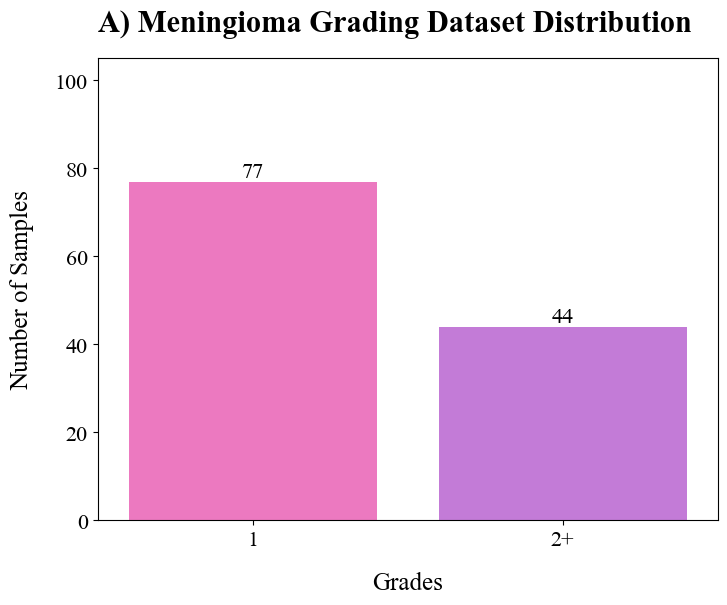

In [4]:
dataset = {
    "Grades": ["1", "2+"],
    "Number of Samples": [77, 44]
}

data = pd.DataFrame(dataset)

colors = ["#ff66c4", "#cb6ce6", "#875dca"]

plt.figure(figsize=(8, 6))
sns.barplot(x="Grades", y="Number of Samples", data=data, hue="Grades", palette=colors)

for index, row in data.iterrows():
    plt.text(row.name, row["Number of Samples"] + 1, row["Number of Samples"], ha='center', fontname="Times New Roman", fontsize=16)

plt.title("A) Meningioma Grading Dataset Distribution", fontsize=22, weight="bold", fontname="Times New Roman", loc="left", pad=20)
plt.xlabel("Grades", fontsize=18, fontname="Times New Roman", labelpad=15)
plt.ylabel("Number of Samples", fontsize=18, fontname="Times New Roman", labelpad=15)
plt.xticks(fontsize=16, fontname="Times New Roman")
plt.yticks(fontsize=16, fontname="Times New Roman")
plt.ylim(0, 105)

plt.show()

In [4]:
data_split = {
    "Split": ["Train", "Train", "Validation", "Validation", "Test", "Test"],
    "Grade": ["1", "2+", "1", "2+", "1", "2+"],
    "Count": [53, 31, 12, 6, 12, 7]
}

df_split = pd.DataFrame(data_split)

df_split.head()

,Split,Grade,Count
0,Train,1,53
1,Train,2+,31
2,Validation,1,12
3,Validation,2+,6
4,Test,1,12


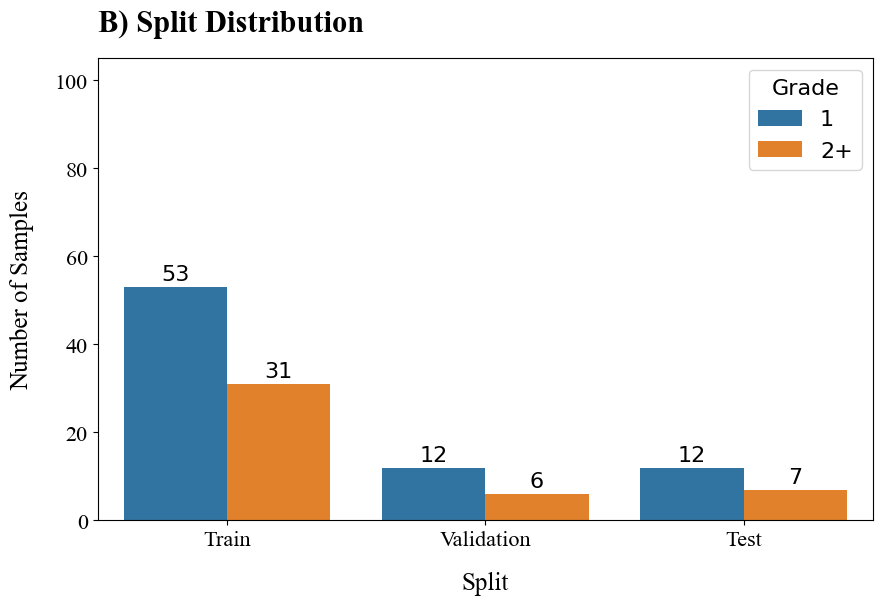

In [5]:
plt.figure(figsize=(10, 6))
colors = ["#ff66c4", "#cb6ce6"]
# ax = sns.barplot(x="Split", y="Count", hue="Grade", data=df_split, palette=colors)
ax = sns.barplot(x="Split", y="Count", hue="Grade", data=df_split)

plt.title("B) Split Distribution", fontsize=22, weight="bold", fontname="Times New Roman", loc="left", pad=20)
plt.xlabel("Split", fontsize=18, fontname="Times New Roman", labelpad=15)
plt.ylabel("Number of Samples", fontsize=18, fontname="Times New Roman", labelpad=15)
plt.ylim(0, 60)
plt.legend(title="Grade", title_fontsize=16, fontsize=16)

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', 
                    fontsize=16, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.xticks(fontsize=16, fontname="Times New Roman")
plt.yticks(fontsize=16, fontname="Times New Roman")
plt.ylim(0, 105)

plt.show()


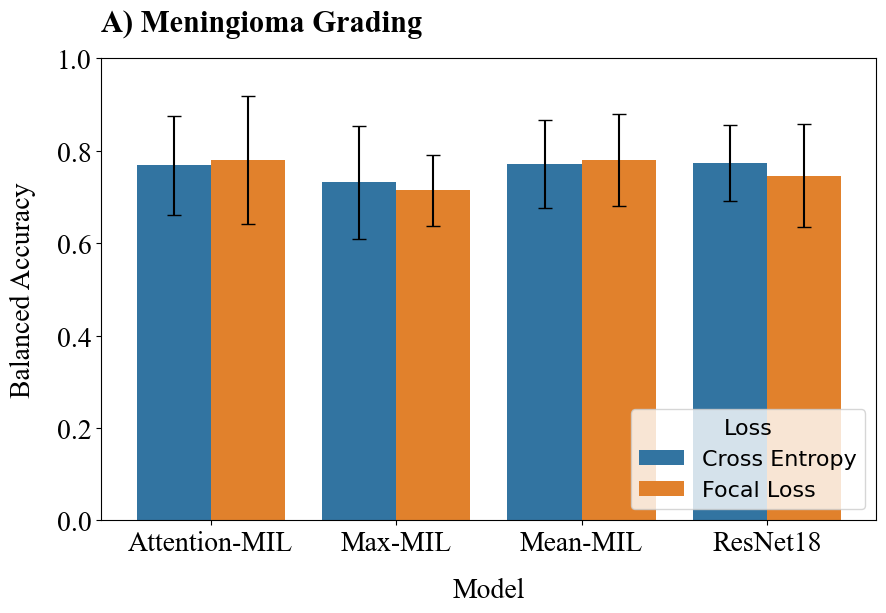

In [6]:
data = {
    "Model": ["Attention-MIL", "Max-MIL", "Mean-MIL", "ResNet18"] * 2,
    "Mean": [0.769, 0.7321, 0.7714, 0.7738, 0.781, 0.7143, 0.7798, 0.7464],
    "Std": [0.1072, 0.1226, 0.0950, 0.0829, 0.1385, 0.0768, 0.0991, 0.1120],
    "Loss": ["Cross Entropy"] * 4 + ["Focal Loss"] * 4
}

colors = ["#ff66c4", "#cb6ce6"]
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
# ax = sns.barplot(x="Model", y="Mean", hue="Loss", data=df, errorbar=None, capsize=.2, palette=colors)
ax = sns.barplot(x="Model", y="Mean", hue="Loss", data=df, errorbar=None, capsize=.2)

for bar, std in zip(ax.patches, df["Std"]):
    x = bar.get_x() + bar.get_width() / 2  # Center of each bar
    y = bar.get_height()
    ax.errorbar(x, y, yerr=std, fmt='none', capsize=5, color='black')


plt.title("A) Meningioma Grading", fontsize=22, weight="bold", fontname="Times New Roman", loc="left", pad=20)
plt.xlabel("Model", fontsize=20, fontname="Times New Roman", labelpad=15)
plt.ylabel("Balanced Accuracy", fontsize=20, fontname="Times New Roman", labelpad=15)
plt.xticks(fontsize=20, fontname="Times New Roman")
plt.yticks(fontsize=20, fontname="Times New Roman")
plt.legend(title="Loss", title_fontsize=16, fontsize=16, loc="lower right")
plt.ylim(0, 1)
plt.show()


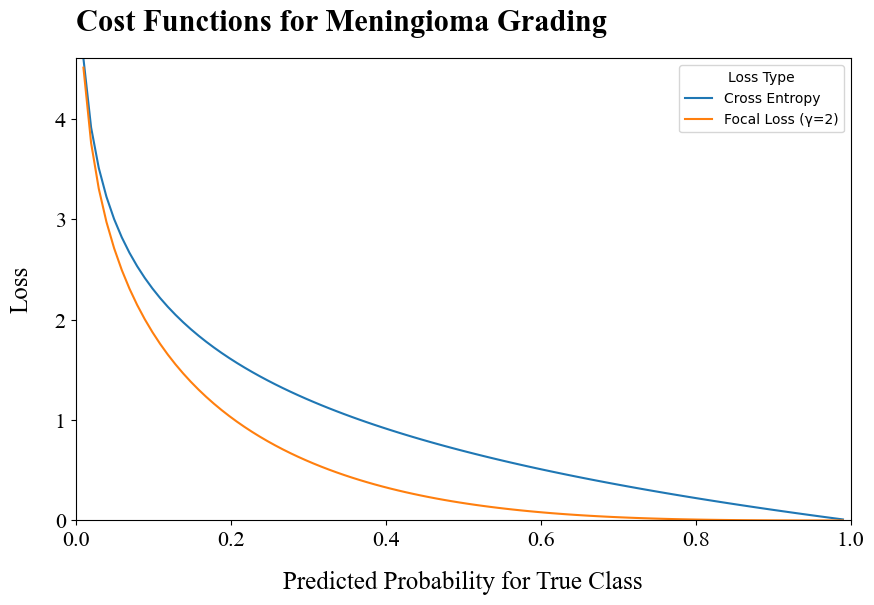

In [7]:
# Define Cross Entropy Loss
def cross_entropy_loss(y_true, y_pred):
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Define Focal Loss with gamma = 2
def focal_loss(y_true, y_pred, gamma=2):
    return - (y_true * (1 - y_pred)**gamma * np.log(y_pred) + (1 - y_true) * (y_pred)**gamma * np.log(1 - y_pred))

# Predicted probabilities for the positive class
y_pred = np.linspace(0.01, 0.99, 100)  # Avoid 0 and 1 to prevent log(0)

# Assuming y_true = 1 (positive class)
y_true = 1

# Calculate losses
cross_entropy_vals = cross_entropy_loss(y_true, y_pred)
focal_loss_vals = focal_loss(y_true, y_pred, gamma=2)

# Create DataFrame for plotting with Seaborn
df = pd.DataFrame({
    'Predicted Probability': np.concatenate([y_pred, y_pred]),
    'Loss': np.concatenate([cross_entropy_vals, focal_loss_vals]),
    'Loss Type': ['Cross Entropy'] * len(y_pred) + ['Focal Loss (γ=2)'] * len(y_pred)
})

# Adjusting the color scheme as per the user's preference
colors = ["#ff66c4", "#cb6ce6"]

plt.figure(figsize=(10, 6))
# sns.lineplot(data=df, x='Predicted Probability', y='Loss', hue='Loss Type', palette=colors)
sns.lineplot(data=df, x='Predicted Probability', y='Loss', hue='Loss Type')

# Customizations
plt.xlabel("Predicted Probability for True Class", fontsize=18, fontname="Times New Roman", labelpad=15)
plt.ylabel("Loss", fontsize=18, fontname="Times New Roman", labelpad=15)
plt.title("Cost Functions for Meningioma Grading", fontsize=22, weight="bold", fontname="Times New Roman", loc="left", pad=20)
plt.xticks(fontsize=16, fontname="Times New Roman")
plt.yticks(fontsize=16, fontname="Times New Roman")

# Enlarging legend fonts
# plt.legend(title="Loss Type", title_fontsize=16, fontsize=16)
plt.xlim(0, 1.0)
plt.ylim(0, df["Loss"].max())
# Display plot
plt.show()
